In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, color, transform, filters, feature

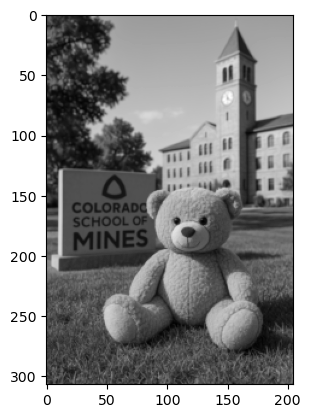

In [11]:
img = util.img_as_float32( color.rgb2gray( io.imread('data/Mines_Teddy_Bear.png') ) )
img = transform.rescale(img, 1/5)
plt.set_cmap('gray') # set default colormap to 'gray'
plt.imshow(img)

### Harris corners

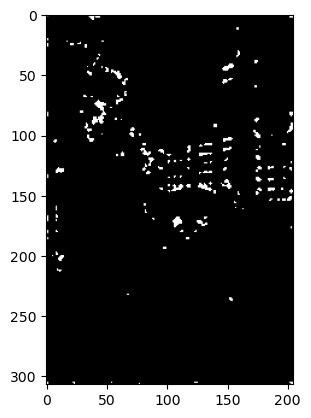

In [14]:
img_harris = feature.corner_harris(img)
plt.imshow(img_harris>0.05)

[[ 45 148]
 [129  12]
 [174 108]
 [ 87 174]
 [145 185]
 [100 175]
 [ 74  42]
 [120  87]
 [ 55 148]
 [142 152]
 [ 88  45]
 [203  11]
 [103 152]
 [115  81]
 [ 49  59]
 [145 106]
 [127 177]
 [ 39 174]
 [110 118]
 [172 127]
 [ 96  35]
 [104  37]
 [ 92 140]
 [ 89  39]
 [145 177]
 [ 95  72]
 [144 132]
 [116 128]
 [236 153]
 [138 176]
 [117 175]
 [128 148]
 [113  95]
 [127 185]
 [144  95]
 [116  63]
 [137 185]
 [160   8]
 [142 118]
 [111 152]]


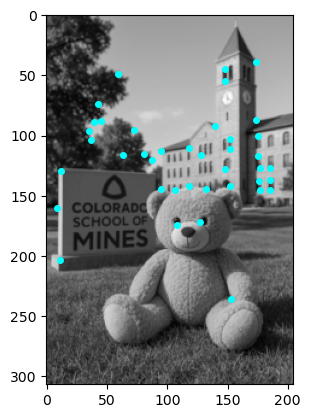

In [45]:
coords = feature.corner_peaks(img_harris, min_distance=5, threshold_rel=0.1)

print(coords)
fig, ax = plt.subplots()
ax.imshow(img)
ax.plot(coords[:,1], coords[:,0], color='cyan', marker='o', linestyle='none', markersize=4)

In [36]:
coords_subpix = feature.corner_subpix(img, coords, window_size=15)
print(coords_subpix)

[[ 47.954372 150.82784 ]
 [127.580444  11.149237]
 [       nan        nan]
 [ 89.52712  174.07838 ]
 [142.14182  185.57292 ]
 [ 97.647224 174.50888 ]
 [ 73.71027   42.32975 ]
 [       nan        nan]
 [ 51.0873   148.69165 ]
 [141.85446  149.54532 ]
 [       nan        nan]
 [201.76692    9.606785]
 [105.94102  150.81491 ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]
 [126.77101  178.23572 ]
 [ 39.261883 173.55536 ]
 [       nan        nan]
 [170.98407  127.38435 ]
 [       nan        nan]
 [102.803116  35.892334]
 [ 92.533966 137.34578 ]
 [ 88.68007   39.279312]
 [       nan        nan]
 [ 96.30926   73.349304]
 [       nan        nan]
 [       nan        nan]
 [236.57918  154.13052 ]
 [137.89433  176.49918 ]
 [115.37237  173.5613  ]
 [124.59198  149.6972  ]
 [       nan        nan]
 [124.432785 184.20575 ]
 [144.88806   96.94005 ]
 [115.49605   61.42788 ]
 [140.92671  185.64828 ]
 [161.13364   11.167492]
 [       nan        nan]
 [108.323814 149.78105 ]]

### SIFT features

[[  3   3]
 [  4  42]
 [  5  36]
 ...
 [124 168]
 [139 168]
 [ 60  54]]
[[  0   0   0 ...  16  15   0]
 [ 28   0   0 ...   0   5   8]
 [  2   8   0 ...   0   2  80]
 ...
 [  0   2  62 ...   0  53 133]
 [ 12   3   4 ...   1  14 128]
 [ 62  88  39 ...   0  42 133]]


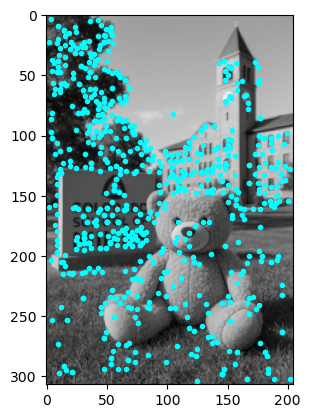

In [46]:
descriptor_extractor = feature.SIFT()

descriptor_extractor.detect_and_extract(img)
keypoints = descriptor_extractor.keypoints
descriptors = descriptor_extractor.descriptors

print(keypoints)
print(descriptors)

fig, ax = plt.subplots()
ax.imshow(img)
ax.plot(keypoints[:,1], keypoints[:,0], color='cyan', marker='o', linestyle='none', markersize=3)

### SIFT matching

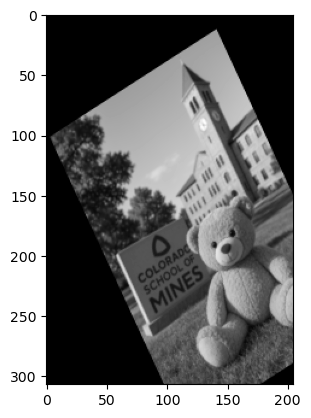

In [53]:
tform = transform.AffineTransform(scale=(1.3, 1.1), rotation=0.5, translation=(50, -100))
img2 = transform.warp(img, tform)
plt.imshow(img2)

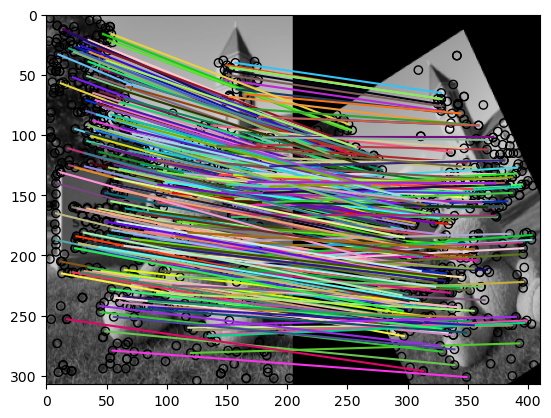

In [65]:
descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches12 = feature.match_descriptors(descriptors, descriptors2, max_ratio=0.6, cross_check=True)


fig, ax = plt.subplots()

feature.plot_matches(
    ax,
    img,
    img2,
    keypoints1=keypoints,
    keypoints2=keypoints2,
    matches=matches12)